In [1]:
import nltk 
import string
import keras
import pandas as pd # Import Pandas for data manipulation using dataframes
import numpy as np # Import Numpy for data statistical analysis 
import matplotlib.pyplot as plt # Import matplotlib for data visualisation
import seaborn as sns # Statistical data visualization
# %matplotlib inline

In [2]:
df_alexa = pd.read_csv('amazon_alexa.tsv', sep='\t')

In [3]:
#df_alexa

In [4]:
positive = df_alexa[df_alexa['feedback']==1]
negative = df_alexa[df_alexa['feedback']==0]

In [5]:
words = df_alexa['verified_reviews'].tolist()

In [6]:
from nltk import word_tokenize
def ultimate_tokenize(sentence):
    # Remove punctuation and digits
    sentence = sentence.translate(str.maketrans('', '', string.punctuation + string.digits))
    return word_tokenize(sentence.lower())

In [7]:
def cleaning(raw_review):
    
    tokens = ultimate_tokenize(raw_review)
    from nltk.corpus import stopwords

    stops = stopwords.words('english')
    stops.extend('.,[,],(,),;,/,-,\',?,",:,<,>,n\'t,|,#,\'s,\",\'re,\'ve,\'ll,\'d,\'re,’'.split(','))
    stops.extend(',')
    
    # 6. Remove stop words. 
    words = [w for w in tokens if not w in stops]
    
    # 7. Stemming
    words = [nltk.stem.SnowballStemmer('english').stem(w) for w in words]
    
    # 8. Join the words back into one string separated by space, and return the result.
    return " ".join(words)


In [8]:
df_alexa['clean_reviews']=df_alexa['verified_reviews'].apply(cleaning)
df_alexa.head()

,rating,date,variation,verified_reviews,feedback,clean_reviews
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,love echo
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,love
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,sometim play game answer question correct alex...
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,lot fun thing yr old learn dinosaur control li...
4,5,31-Jul-18,Charcoal Fabric,Music,1,music


In [9]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

%matplotlib inline

In [10]:
def cloud(data,backgroundcolor = 'white', width = 800, height = 600):
    wordcloud = WordCloud(stopwords = STOPWORDS, background_color = backgroundcolor,
                         width = width, height = height).generate(data)
    plt.figure(figsize = (15, 10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

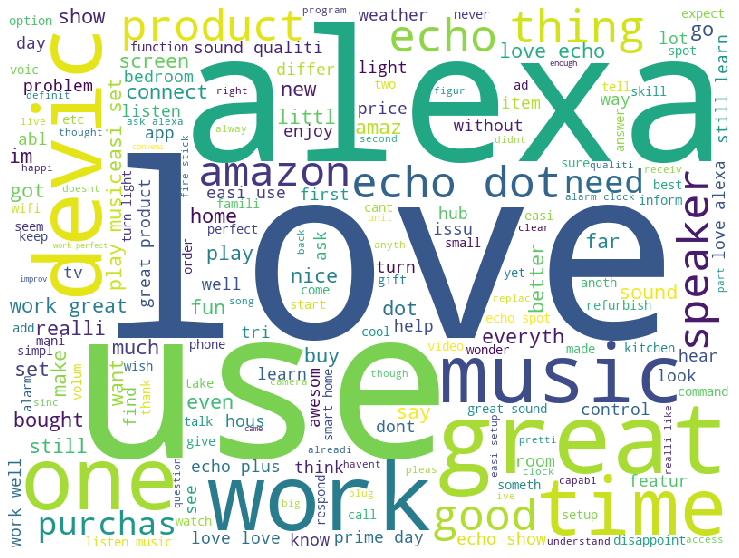

In [11]:
cloud(' '.join(df_alexa['clean_reviews']))

In [12]:
df_alexa['freq_word'] = df_alexa['clean_reviews'].apply(lambda x: len(str(x).split()))
df_alexa['unique_freq_word'] = df_alexa['clean_reviews'].apply(lambda x: len(set(str(x).split())))


median of word frequency:  7.0
median of unique word frequency:  7.0


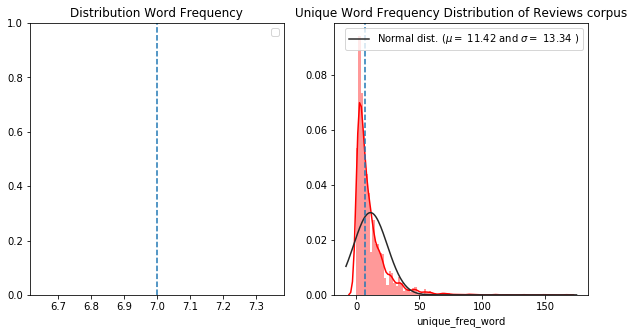

In [15]:
fig, axes = plt.subplots(ncols=2)
fig.set_size_inches(10,5)

#sns.distplot(df_alexa['freq_word'], bins = 90, ax=axes[0], fit = stats.norm)
(mu0, sigma0) = stats.norm.fit(df_alexa['freq_word'])
axes[0].legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu0, sigma0)],loc='best')
axes[0].set_title("Distribution Word Frequency")
axes[0].axvline(df_alexa['freq_word'].median(), linestyle='dashed')
print("median of word frequency: ", df_alexa['freq_word'].median())


sns.distplot(df_alexa['unique_freq_word'], bins = 90, ax=axes[1], color = 'r', fit = stats.norm)
(mu1, sigma1) = stats.norm.fit(df_alexa['unique_freq_word'])
axes[1].set_title("Unique Word Frequency Distribution" 
                  " of Reviews corpus")
axes[1].legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu1, sigma1)],loc='best')
axes[1].axvline(df_alexa['unique_freq_word'].median(), linestyle='dashed')
print("median of unique word frequency: ", df_alexa['unique_freq_word'].median())

In [16]:
from sklearn.feature_extraction.text import CountVectorizer

In [17]:
vectorizer = CountVectorizer(analyzer = "word", 
                             tokenizer = None, 
                             preprocessor = None, 
                             stop_words = None, 
                             max_features = 18000,
                             min_df = 2,
                             ngram_range = (1,3)
                            )

In [18]:
from sklearn.pipeline import Pipeline
pipe = Pipeline( [('vect', vectorizer)] )

In [19]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [20]:
X = df_alexa['clean_reviews'].tolist()

In [21]:
Y = df_alexa['feedback'].tolist()

In [22]:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X, Y, test_size=0.3)
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)
#Effective Train-70%, Validation-15%, Test-15% breakup

In [23]:
#print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

In [24]:
print(len(Y_train))

2205


In [25]:
X_train = pipe.fit_transform(X_train)
X_val = pipe.transform(X_val)
print('train dim:', X_train.shape, 'test dim:', X_val.shape)


train dim: (2205, 9151) test dim: (472, 9151)


In [26]:
lexi = vectorizer.get_feature_names()

In [27]:
lexi[:5]

['abil', 'abil alexa', 'abil day', 'abil day play', 'abil listen']

In [28]:
X_sum = pd.DataFrame(np.sum(X_train, axis=0), columns = lexi)

In [29]:
X_sum.head()

,abil,abil alexa,abil day,abil day play,abil listen,abil listen music,abil multipl,abil multipl differ,abil play,abl,...,youtub via amazon,youtub video,yr,yr old,yr old decid,yrs,yrs cute,zero,zigbe,zwave
0,25,2,2,2,2,2,2,2,3,79,...,2,4,3,3,2,2,2,3,3,2


In [30]:
df_alexa['length'] = df_alexa['clean_reviews'].apply(len)
max_tokens = ultimate_tokenize(df_alexa[df_alexa['length'] == df_alexa['length'].max()]['clean_reviews'].iloc[0])
max_words= len(max_tokens)
max_words

257

Neural Network using Keras Sequential

In [31]:
from numpy import array
import keras
import sklearn
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten
from keras.layers import GlobalMaxPooling1D
from keras.layers.embeddings import Embedding
from keras.preprocessing.text import Tokenizer

In [32]:
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import GridSearchCV, StratifiedKFold, learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.neural_network import MLPClassifier

In [33]:
kfold = StratifiedKFold( n_splits = 8, random_state = None )

In [34]:
sv = sklearn.svm.LinearSVC(random_state=2018)

param_grid2 = {
    'loss':['hinge'],
    'class_weight':[{1:1}],
    'C': [0.01]
}

gs_sv = GridSearchCV(sv, param_grid = [param_grid2], verbose = 1, cv = kfold, n_jobs = -1, scoring = 'roc_auc' )
gs_sv.fit(X_train, Y_train)
gs_sv_best = gs_sv.best_estimator_
print(gs_sv.best_params_)

Fitting 8 folds for each of 1 candidates, totalling 8 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


{'C': 0.01, 'class_weight': {1: 1}, 'loss': 'hinge'}


[Parallel(n_jobs=-1)]: Done   2 out of   8 | elapsed:    2.0s remaining:    6.3s
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    2.1s finished


In [35]:
print(gs_sv.best_score_)

0.8975807689482067


In [36]:
coefficients = gs_sv_best.coef_
index = coefficients.argsort()

In [37]:
feature_names = np.array(pipe.named_steps['vect'].get_feature_names())
first_x = 50
last_x = first_x+1

In [38]:
feature_names[index][0][:first_x]

array(['stop', 'month', 'return', 'tri', 'back', 'disappoint', 'half',
       'would', 'amazon', 'fix', 'terribl', 'cycl', 'custom', 'repair',
       'unplug', 'need prime', 'stop work', 'money', 'devic', 'doesnt',
       'realiz', 'famili', 'buy', 'send', 'number', 'spent', 'half time',
       'turn', 'either', 'never', 'hope', 'item', 'im sure', 'piec',
       'within', 'respond', 'card', 'noth', 'sure', 'reset', 'switch',
       'problem', 'quit', 'thing tri', 'anyth', 'hue', 'useless', 'forc',
       'never buy', 'sound like'], dtype='<U29')

In [39]:
feature_names[index][0][-last_x::1]

array(['display', 'although', 'rotat', 'light', 'thought', 'even though',
       'iphon', 'sinc', 'almost', 'control', 'camera', 'would buy', 'nd',
       'research', 'hear', 'expect', 'issu', 'awesom', 'option', 'room',
       'show', 'capabl', 'decid', 'timer', 'bedroom', 'excel',
       'amazon prime', 'husband', 'sit', 'easier', 'though', 'tv',
       'command', 'stuff', 'nice', 'includ', 'instruct', 'link', 'fun',
       'took', 'perfect', 'well', 'good', 'best', 'easi', 'enjoy', 'amaz',
       'littl', 'work great', 'great', 'love'], dtype='<U29')

In [40]:
feature_names_comb = list(feature_names[index][0][:first_x]) + list(feature_names[index][0][-last_x::1])

In [41]:
index_comb = list(coefficients[0][index[0][:first_x]]) + list(coefficients[0][index[0][-last_x::1]])

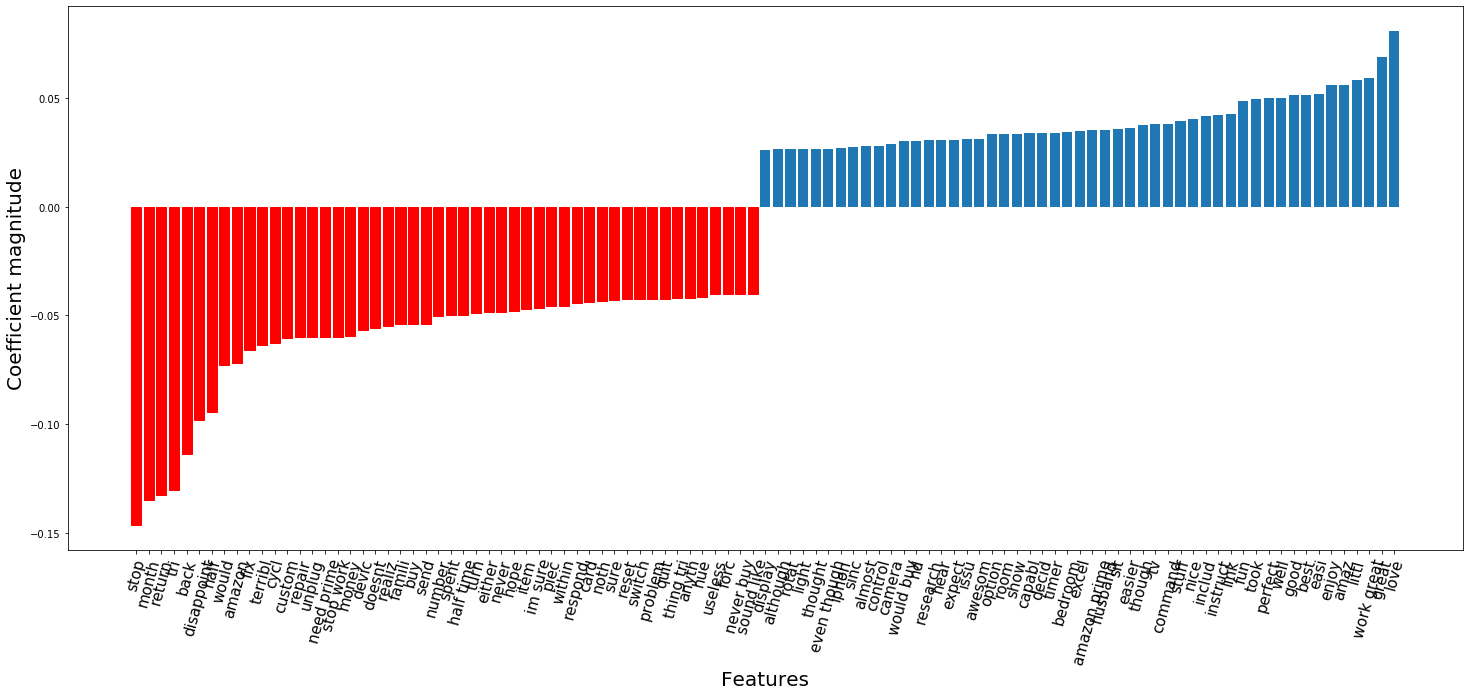

In [42]:
plt.figure(figsize=(25,10))
barlist = plt.bar(list(i for i in range(first_x+last_x)), index_comb)
plt.xticks(list(i for i in range(first_x+last_x)),feature_names_comb,rotation=75,size=15)
plt.ylabel('Coefficient magnitude',size=20)
plt.xlabel('Features',size=20)

# color the first smallest 30 bars red
for i in range(first_x):
    barlist[i].set_color('r')

plt.show()

In [43]:
lr = LogisticRegression(random_state = 2018)


lr2_param = {
    'penalty':['l2'],
    'dual':[False],
    'C':[0.05],
    'class_weight':['balanced']
    }

lr_CV = GridSearchCV(lr, param_grid = [lr2_param], cv = kfold, scoring = 'roc_auc', n_jobs = -1, verbose = 1)
lr_CV.fit(X_train, Y_train)
print(lr_CV.best_params_)
logi_best = lr_CV.best_estimator_

Fitting 8 folds for each of 1 candidates, totalling 8 fits
{'C': 0.05, 'class_weight': 'balanced', 'dual': False, 'penalty': 'l2'}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   8 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    0.0s finished
C:\Users\yashd\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [44]:
print(lr_CV.best_score_)

0.8966659058921983
